In [10]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from io import BytesIO

In [11]:
dataset = json.load(open("WebQA_test.json", "r"))
print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
#print(Counter([dataset[k]['Qcate'] for k in dataset]))


Counter({'test': 7540})
7540


In [12]:
print(dataset.keys())

sample_key = list(dataset.keys())[0]

dict_keys(['d5bbc4440dba11ecb1e81171463288e9', 'd5bbc8180dba11ecb1e81171463288e9', 'd5bbcaca0dba11ecb1e81171463288e9', 'd5bbcd040dba11ecb1e81171463288e9', 'd5bbcd5e0dba11ecb1e81171463288e9', 'd5bbcda40dba11ecb1e81171463288e9', 'd5bbd3c60dba11ecb1e81171463288e9', 'd5bbd51a0dba11ecb1e81171463288e9', 'd5bbd5600dba11ecb1e81171463288e9', 'd5bbd8940dba11ecb1e81171463288e9', 'd5bbdb1e0dba11ecb1e81171463288e9', 'd5bbdd080dba11ecb1e81171463288e9', 'd5bbdd4e0dba11ecb1e81171463288e9', 'd5bbddf80dba11ecb1e81171463288e9', 'd5bbe2d00dba11ecb1e81171463288e9', 'd5bbe4880dba11ecb1e81171463288e9', 'd5bbe5dc0dba11ecb1e81171463288e9', 'd5bbec760dba11ecb1e81171463288e9', 'd5bbed520dba11ecb1e81171463288e9', 'd5bbef460dba11ecb1e81171463288e9', 'd5bbef960dba11ecb1e81171463288e9', 'd5bbf1940dba11ecb1e81171463288e9', 'd5bbf37e0dba11ecb1e81171463288e9', 'd5bbf6bc0dba11ecb1e81171463288e9', 'd5bbf8a60dba11ecb1e81171463288e9', 'd5bbf8f60dba11ecb1e81171463288e9', 'd5bbfe0a0dba11ecb1e81171463288e9', 'd5bc03e60dba11ec

In [13]:
print(dataset[sample_key].keys())
print("Question:", dataset[sample_key]['Q'])
print("Answer:", dataset[sample_key]['A'])

dict_keys(['Q', 'A', 'split', 'Guid', 'txt_Facts', 'img_Facts'])
Question: "Are both the Original Playboy Mansion and Gage Park High School made of brick?"
Answer: ['']


In [14]:
dataset = json.load(open("WebQA_train_val.json", "r"))
print("Splits:", Counter([dataset[k]['split'] for k in dataset]))
print("Guid Count:", len(set([dataset[k]['Guid'] for k in dataset])))
print("Question Categories: ", Counter([dataset[k]['Qcate'] for k in dataset]))

Splits: Counter({'train': 36766, 'val': 4966})
Guid Count: 41732
Question Categories:  Counter({'text': 20267, 'YesNo': 7320, 'Others': 5412, 'choose': 4220, 'number': 2118, 'color': 1830, 'shape': 565})


In [15]:
print(dataset.keys())

sample_key = list(dataset.keys())[0]

dict_keys(['d5bbc6d80dba11ecb1e81171463288e9', 'd5bbc7640dba11ecb1e81171463288e9', 'd5bbc7c80dba11ecb1e81171463288e9', 'd5bbc8720dba11ecb1e81171463288e9', 'd5bbc8cc0dba11ecb1e81171463288e9', 'd5bbc91c0dba11ecb1e81171463288e9', 'd5bbc9760dba11ecb1e81171463288e9', 'd5bbc9bc0dba11ecb1e81171463288e9', 'd5bbca160dba11ecb1e81171463288e9', 'd5bbca840dba11ecb1e81171463288e9', 'd5bbcb1a0dba11ecb1e81171463288e9', 'd5bbcb740dba11ecb1e81171463288e9', 'd5bbcbc40dba11ecb1e81171463288e9', 'd5bbcc140dba11ecb1e81171463288e9', 'd5bbcc5a0dba11ecb1e81171463288e9', 'd5bbccb40dba11ecb1e81171463288e9', 'd5bbcdfe0dba11ecb1e81171463288e9', 'd5bbce580dba11ecb1e81171463288e9', 'd5bbceb20dba11ecb1e81171463288e9', 'd5bbcf020dba11ecb1e81171463288e9', 'd5bbcf480dba11ecb1e81171463288e9', 'd5bbcfa20dba11ecb1e81171463288e9', 'd5bbcff20dba11ecb1e81171463288e9', 'd5bbd04c0dba11ecb1e81171463288e9', 'd5bbd0920dba11ecb1e81171463288e9', 'd5bbd0e20dba11ecb1e81171463288e9', 'd5bbd13c0dba11ecb1e81171463288e9', 'd5bbd1820dba11ec

In [16]:
print(dataset[sample_key].keys())
print("Question:", dataset[sample_key]['Q'])
print("Answer:", dataset[sample_key]['A'])

dict_keys(['Q', 'A', 'topic', 'split', 'Qcate', 'Guid', 'img_posFacts', 'img_negFacts', 'txt_negFacts', 'txt_posFacts'])
Question: "Are both the National Museum of the American Indian in Washington, D.C. and the Xanadu House in Kissimmee, Florida the same color?"
Answer: ['"Yes, both the National Museum of the American Indian in Washington, D.C. and the Xanadu House in Kissimmee, Florida are beige."']


In [17]:
count = 0
for k in dataset:
    if dataset[k]['Qcate'] == 'text': continue
    for im in dataset[k]['img_posFacts']:
        if 'Litoria caerulea' in im['caption']:
            print("\n", k)
            pprint(dataset[k])
            count += 1
print(count)


 d5c5bcf60dba11ecb1e81171463288e9
{'A': ['"The belly of a Green Tree Frog is white."'],
 'Guid': 'd5c5bcf60dba11ecb1e81171463288e9',
 'Q': '"What color is the belly of a Green Tree Frog?"',
 'Qcate': 'color',
 'img_negFacts': [{'caption': 'Green Tree Frog on verandah tiles 2  Taken in '
                              'Chinchilla at a staff house I was staying at.',
                   'image_id': 30348447,
                   'imgUrl': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Green_Tree_Frog_on_verandah_tiles_2.JPG/800px-Green_Tree_Frog_on_verandah_tiles_2.JPG',
                   'title': 'Green Tree Frog on verandah tiles 2',
                   'url': 'https://commons.wikimedia.org/wiki/File:Green_Tree_Frog_on_verandah_tiles_2.JPG'},
                  {'caption': 'Green Tree Frog - Hyla cinerea, Julie Metz '
                              'Wetlands, Woodbridge, Virginia Green Tree Frog '
                              '- Hyla cinerea, Julie Metz Wetlands, '
            

In [19]:
# Can't run: 
# FileNotFoundError: [Errno 2] No such file or directory: '/data/yingshac/MMMHQA/base64_0904/imgs.lineidx'

"""
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))
"""

'\nwith open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:\n    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]\nprint(len(lineidx))\n'

In [20]:
### Txt-based queries
show_distractors = False

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] == 'text': break

print(k)
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

d5d65dfe0dba11ecb1e81171463288e9
Q =  Clopas shared what relationship with Saint Joseph, characterized as a man or boy who shares one or more parents with another?

A =
['Brother']

------ Positive Evidence ------ 
Catholic and Orthodox traditions believed that Clopas is a brother of Saint Joseph, and that he is the same person with Cleophas. Cleopas has no further occurrence in the New Testament, but in tradition he has often been identified with Clopas, another New Testament figure mentioned in John's Gospel.
https://en.wikipedia.org/wiki/Cleopas
A brother is a man or boy who shares one or more parents with another. The female counterpart is a sister. Although the term typically refers to a familial relationship, it is sometimes used endearingly to refer to non-familial relationships. A full brother is a first degree relative .
https://en.m.wikipedia.org/wiki/Brothers


In [23]:
### Image-based queries


# Can't run:
# FileNotFoundError: [Errno 2] No such file or directory: '/data/yingshac/MMMHQA/base64_0904/imgs.tsv'

"""

show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


for k in dataset:
    #k = random.choice(list(dataset.keys()))
    #if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
    if (not dataset[k]['Qcate'] == 'text') and 'simpson' in dataset[k]['Q'].lower():
        #if random.random()>0.1: continue
        print(k)
k = 'd5cc3c660dba11ecb1e81171463288e9'
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    #print(f['imgUrl'])
    image_id = f['image_id']
    with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = Image.open(BytesIO(base64.b64decode(img_base64)))    
    ax.imshow(im)
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])

"""

'\n\nshow_distractors = False\nQcate = [\'color\', \'shape\', \'number\', \'choose\', \'YesNo\', \'Others\']\n\n\nfor k in dataset:\n    #k = random.choice(list(dataset.keys()))\n    #if dataset[k][\'Qcate\'] in Qcate and dataset[k][\'split\'] == \'test\':\n    if (not dataset[k][\'Qcate\'] == \'text\') and \'simpson\' in dataset[k][\'Q\'].lower():\n        #if random.random()>0.1: continue\n        print(k)\nk = \'d5cc3c660dba11ecb1e81171463288e9\'\nprint(k)\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))\nprint("Q = ", dataset[k][\'Q\'])\nprint("\nA =")\npprint(dataset[k][\'A\'])\nprint("\n------ Positive Evidence ------ ")\nfor ax, f in zip(axes.ravel(), dataset[k][\'img_posFacts\']):\n    #print(f[\'imgUrl\'])\n    image_id = f[\'image_id\']\n    with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:\n        fp.seek(lineidx[int(image_id)%10000000])\n        imgid, img_base64 = fp.readline().strip().split(\'\t\')\n    print(image_id, imgid) # image_id in d

d5c4166c0dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
Q =  "On the Krusty Burger store sign in Cuenca, Ecuador, which Simpsons characters are featured?"

A =
['"The Simpsons characters featured are Homer and Bart on the Krusty Burger '
 'store sign in Cuenca, Ecuador."']

------ Positive Evidence ------ 
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Krosty_Burger_en_Cuenca%2C_Ecuador-_2013-10-12_12-40.jpg/800px-Krosty_Burger_en_Cuenca%2C_Ecuador-_2013-10-12_12-40.jpg
https://commons.wikimedia.org/wiki/File:Krosty_Burger_en_Cuenca%2C_Ecuador-_2013-10-12_12-40.jpg
Caption =  Krosty Burger en Cuenca, Ecuador- 2013-10-12 12-40


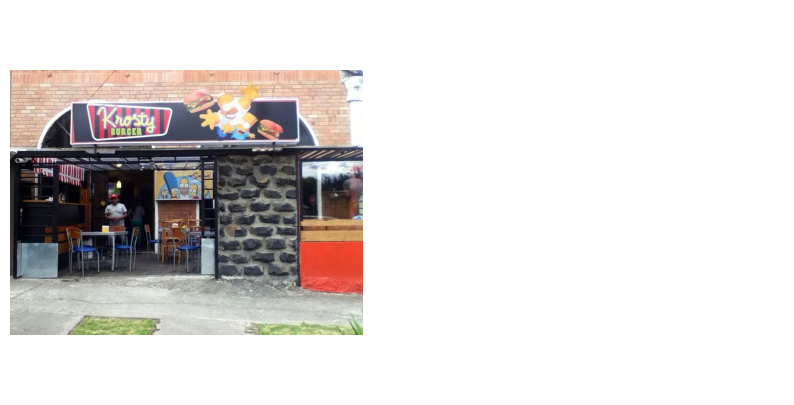

In [29]:
import requests
from PIL import Image
import numpy as np

def get_image_matrix_from_url(image_url):
    # Fetch the image from the URL
    response = requests.get(image_url)
    
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    return img_array


### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


for k in dataset:
    #k = random.choice(list(dataset.keys()))
    #if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
    if (not dataset[k]['Qcate'] == 'text') and 'simpson' in dataset[k]['Q'].lower():
        #if random.random()>0.1: continue
        print(k)
k = 'd5cc3c660dba11ecb1e81171463288e9'
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    print(f['imgUrl'])
    im = get_image_matrix_from_url(f['imgUrl'])
    ax.imshow(im)
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])

# Retriever

In [33]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (c:\Users\Adrian\miniconda3\envs\tf\lib\site-packages\typing_extensions.py)